In [687]:
# Observed trend 1 : 
#  Urban has more short distance rides than the rest. 
#  Urban area has more rides but its average fee is lower. Almost 1/3 of total rides happends in urban area.
# Observed trend 2 :
#  Urban has more drivers. B
#  Because the plot side is larger. 68% of total drivers come from urban area.
# Observed trend 3 :
#  Most of fares come from urban area but the distance of riders tend to longer.
#  Because 62% of total fares come from rural area but its average fare is higher.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
ridefile_path = 'data/ride_data.csv'
ride_df = pd.read_csv(ridefile_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
cityfile_path = 'data/city_data.csv'
city_df = pd.read_csv(cityfile_path)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
pb_df = pd.merge(ride_df, city_df, how = 'outer', on = 'city')
pb_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [7]:
ub_df = pb_df.loc[pb_df['type'] == 'Urban']
ub_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [8]:
sub_df = pb_df.loc[pb_df['type'] == 'Suburban']
sub_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-05-16 21:25:03,26.26,4051110168629,15,Suburban
1627,Port James,2016-01-04 22:46:29,20.25,3994763896598,15,Suburban
1628,Port James,2016-01-27 19:25:42,21.86,2433830274897,15,Suburban
1629,Port James,2016-05-30 15:35:47,38.05,424462809740,15,Suburban


In [729]:
ru_df = pb_df.loc[pb_df['type'] == 'Rural']
ru_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2251,Horneland,2016-03-22 21:22:20,31.53,1797785685674,8,Rural
2252,Horneland,2016-01-26 09:38:17,21.73,5665544449606,8,Rural
2253,Horneland,2016-03-25 02:05:42,20.04,5729327140644,8,Rural
2254,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural


In [705]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [741]:
# urban data
ub_count = ub_df.groupby('city').count()
ub_mean = ub_df.groupby('city').mean()

ub_avg_fare_list = list(ub_mean['fare'])
ub_ride_list = list(ub_count['ride_id'])
ub_driver_list = list(ub_mean['driver_count'])
ub_lar_driver_list = [x*2 for x in ub_driver_list]

In [742]:
# suburban data
sub_count = sub_df.groupby('city').count()
sub_mean = sub_df.groupby('city').mean()

sub_avg_fare_list = list(sub_mean['fare'])
sub_ride_list = list(sub_count['ride_id'])
sub_driver_list = list(sub_mean['driver_count'])
sub_lar_driver_list = [x*2 for x in ub_driver_list]

In [743]:
# rural data
ru_count = ru_df.groupby('city').count()
ru_mean = ru_df.groupby('city').mean()

ru_avg_fare_list = list(ru_mean['fare'])
ru_ride_list = list(ru_count['ride_id'])
ru_driver_list = list(ru_mean['driver_count'])
ru_lar_driver_list = [x*2 for x in ub_driver_list]

In [744]:
colors = ['lightcoral', 'lightskyblue', 'Gold']

In [745]:
urban = plt.scatter(ub_ride_list, ub_avg_fare_list, marker="o", facecolors=colors[0], edgecolors="black", s=ub_lar_driver_list, alpha=0.75)
suburban = plt.scatter(sub_ride_list, sub_avg_fare_list, marker="o", facecolors=colors[1], edgecolors="black", s=sub_lar_driver_list, alpha=0.75)
rural = plt.scatter(ru_ride_list, ru_avg_fare_list, marker="o", facecolors=colors[2], edgecolors="black", s=ru_lar_driver_list, alpha=0.75)

In [746]:
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Rider Sharing Data (2016)')
plt.figtext(0.95, 0.6, 'Notes:', rotation='horizontal')
plt.figtext(0.95, 0.55, 'Circle size collerates with driver count per city.', rotation='horizontal')
plt.figtext(0.73, 0.83, 'City Types', rotation='horizontal')

Text(0.73,0.83,'City Types')

In [747]:
lgnd = plt.legend((urban, suburban, rural),('Urban', 'Suburban', 'Rural'),loc='upper right',bbox_to_anchor=(1, 0.95))
for handle in lgnd.legendHandles:
    handle.set_sizes([30])

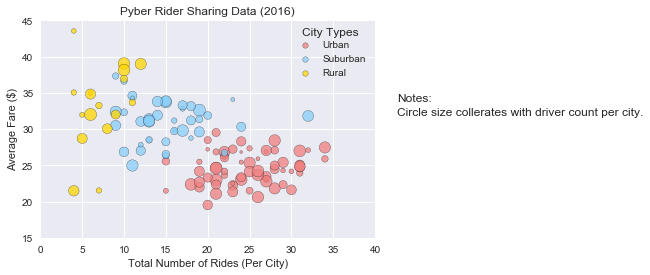

In [748]:
#sns.set()
plt.show()

In [567]:
# In addition, you will be expected to produce the following three pie charts:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [31]:
u_pb_df = pb_df.drop_duplicates(['city'], keep = 'last')
t_driver_df = u_pb_df.groupby('type').sum()
t_driver_df

,fare,ride_id,driver_count
type,,,
Rural,632.39,94410487104274,104
Suburban,1214.61,229842791708027,635
Urban,1554.37,309657203558548,2607


In [32]:
t_sum_df = pb_df.groupby('type').sum()
t_count_df = pb_df.groupby('type').count()

t_type_list = list(t_count_df.index.values)
t_fare_list = list(t_sum_df['fare'])
t_ride_list = list(t_count_df['ride_id'])
t_driver_list = list(t_driver_df['driver_count'])

In [17]:
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0.1,0.1,0)

In [18]:
plt.pie(t_fare_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x5d62b30>,
 [Text(-1.05986,0.562756,'Rural'),
  Text(-0.93658,-0.750212,'Suburban'),
  Text(0.983035,0.493602,'Urban')],
 [Text(-0.618252,0.328274,'6.7%'),
  Text(-0.546338,-0.437624,'30.3%'),
  Text(0.536201,0.269237,'63.0%')])

In [19]:
#plt.axis("equal")

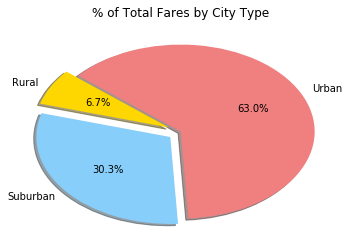

In [20]:
plt.title('% of Total Fares by City Type')
plt.show()

In [21]:
plt.pie(t_ride_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x5dc53f0>,
 [Text(-1.03368,0.609521,'Rural'),
  Text(-1.07564,-0.531982,'Suburban'),
  Text(1.05282,0.318709,'Urban')],
 [Text(-0.602977,0.355554,'5.3%'),
  Text(-0.627455,-0.310323,'26.3%'),
  Text(0.574264,0.173841,'68.4%')])

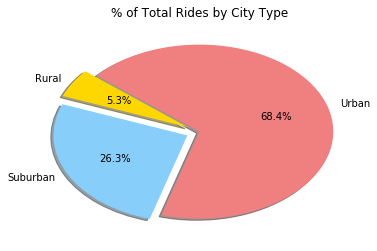

In [22]:
plt.title('% of Total Rides by City Type')
plt.show()

In [23]:
plt.pie(t_driver_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x689fd90>,
 [Text(-0.990074,0.678051,'Rural'),
  Text(-1.19477,-0.111881,'Suburban'),
  Text(1.09999,-0.00470497,'Urban')],
 [Text(-0.577543,0.39553,'3.1%'),
  Text(-0.696951,-0.0652636,'19.0%'),
  Text(0.599995,-0.00256635,'77.9%')])

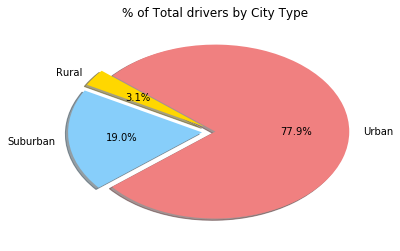

In [24]:
plt.title('% of Total drivers by City Type')
plt.show()